 Project: Regression on Spotify Song Popularity
In this project, we explore a real-world dataset containing detailed attributes of songs on Spotify. The dataset includes track metadata, audio features, and song characteristics. Our goal is to build an end-to-end machine learning pipeline—from data preprocessing and exploration to model building and evaluation—to predict the popularity of a song.

🎯 Objective
The primary objective is to develop and compare regression models that can accurately predict the popularity score of songs on Spotify. Accurate predictions can support music streaming platforms, artists, and marketers in identifying hit songs, curating playlists, and making data-driven promotion decisions.

🤖 Models Evaluated
- Linear Regression

- Polynomial Regression

- Support Vector Regression (SVR)

- Random Forest Regressor

- Tuned Random Forest Regressor

- XGBoost Regressor



📊 Evaluation Metrics
To assess and compare model performance, we use the following regression metrics:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

These metrics help evaluate how closely the predicted popularity scores align with the actual values.

Outcome
By comparing these models, we aim to:

- Determine the most effective algorithm for predicting song popularity

- Understand the impact of different audio and metadata features on a song's success

- Provide actionable insights for artists, producers, and platforms to better forecast and promote music trends

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S2/Reression/Spotify_data.csv")

In [3]:
data.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [4]:
data.drop('Unnamed: 0',axis=1)

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,https://open.spotify.com/track/6AI3ezQ4o3HUoP6...,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,https://open.spotify.com/track/2HYFX63wP3otVIv...,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,https://open.spotify.com/track/7iabz12vAuVQYye...,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,https://open.spotify.com/track/331l3xABO0HMr1K...,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,https://open.spotify.com/track/48lxT5qJF0yYyf2...,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Tu Chahiye,"Pritam, Atif Aslam",Bajrangi Bhaijaan,4nZOPP0atfJbBlkedLYi7t,3aaiAWCet6sbfOfLSn3g7i,66,2015-07-07,272680,False,https://open.spotify.com/track/3aaiAWCet6sbfOf...,...,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068
223,"Aabaad Barbaad (From ""Ludo"")","Pritam, Arijit Singh","Aabaad Barbaad (From ""Ludo"")",1PzsfgcbPbiW7uflc9Zi5Z,0hFUtSsV2itYEUTZGj6w5H,58,2020-10-21,309103,False,https://open.spotify.com/track/0hFUtSsV2itYEUT...,...,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001
224,Jag Ghoomeya,"Vishal-Shekhar, Rahat Fateh Ali Khan, Irshad K...",Sultan,0tAi6H8acUKefYMIEuxcMA,4KCbZcshgibfJSCAkg87Lv,62,2016-05-31,281992,False,https://open.spotify.com/track/4KCbZcshgibfJSC...,...,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653
225,"Tumhe Kitna Pyaar Karte (From ""Bawaal"")","Mithoon, Arijit Singh, Manoj Muntashir","Tumhe Kitna Pyaar Karte (From ""Bawaal"")",20zQZcEhMLsDUn1LhPCEFY,03hJuEQpEQERrHpjcXKWzJ,65,2023-07-07,305232,False,https://open.spotify.com/track/03hJuEQpEQERrHp...,...,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855


In [5]:
data.isna().sum()

Unnamed: 0          0
Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

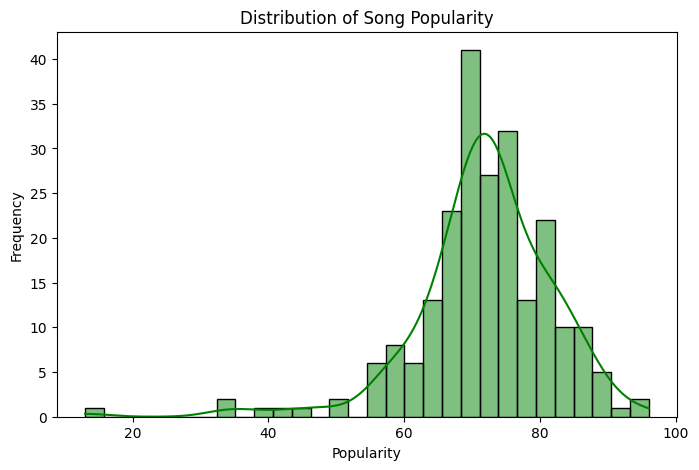

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data['Popularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()



1. Most songs have high popularity scores: The histogram shows that most songs are concentrated towards the higher end of the popularity scale (70-90), indicating that many songs tend to be well-liked.
2. Peak popularity around 60: Although the majority of songs have high popularity scores, the peak of the histogram is around 60, suggesting that this is a common popularity level for songs.

/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_5027/3050979862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_songs['Track Name'], x=top_songs['Popularity'], palette='viridis')


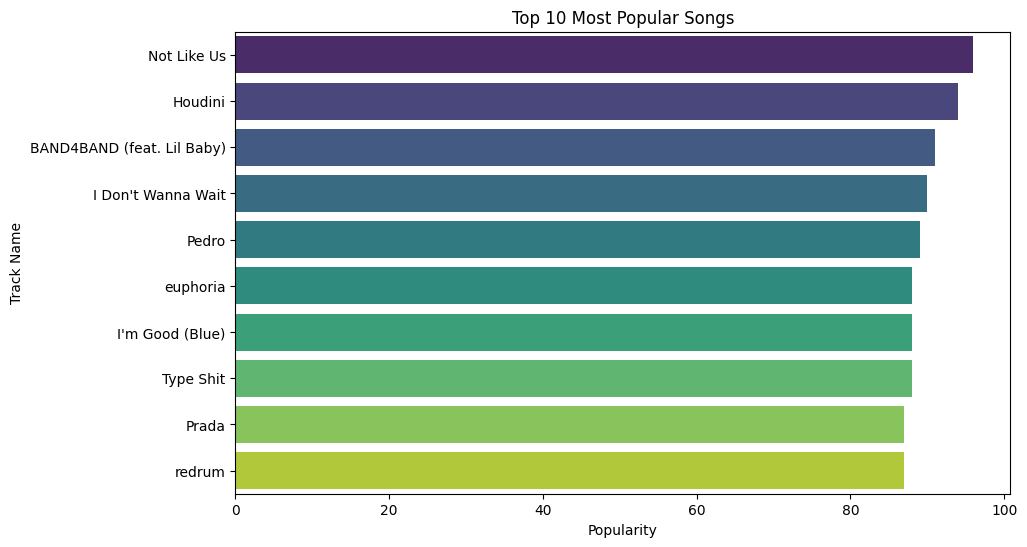

In [8]:
top_songs = data.sort_values(by='Popularity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_songs['Track Name'], x=top_songs['Popularity'], palette='viridis')
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()


1. Most popular song: "Not Like Us" has the highest popularity score.
2. Popularity trend: The popularity scores decrease gradually from the top song to the 10th song, indicating a consistent decline in popularity among the top 10 songs.

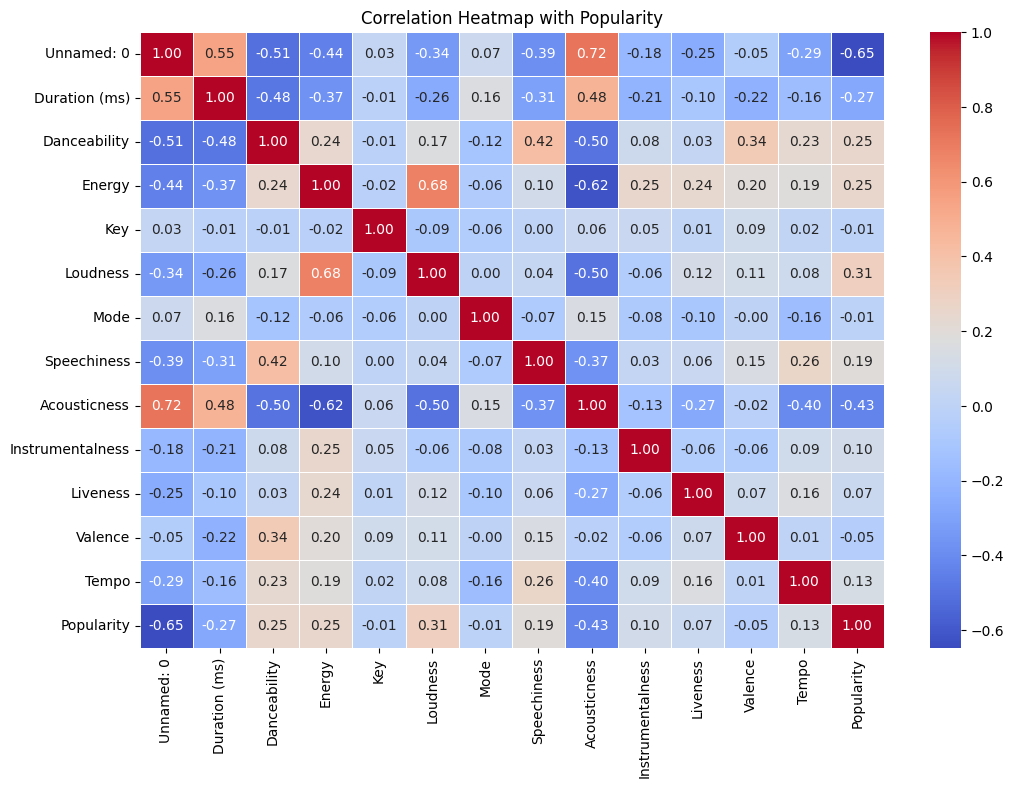

In [9]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Popularity'])
corr = data[numeric_cols.columns.tolist() + ['Popularity']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Popularity')
plt.show()


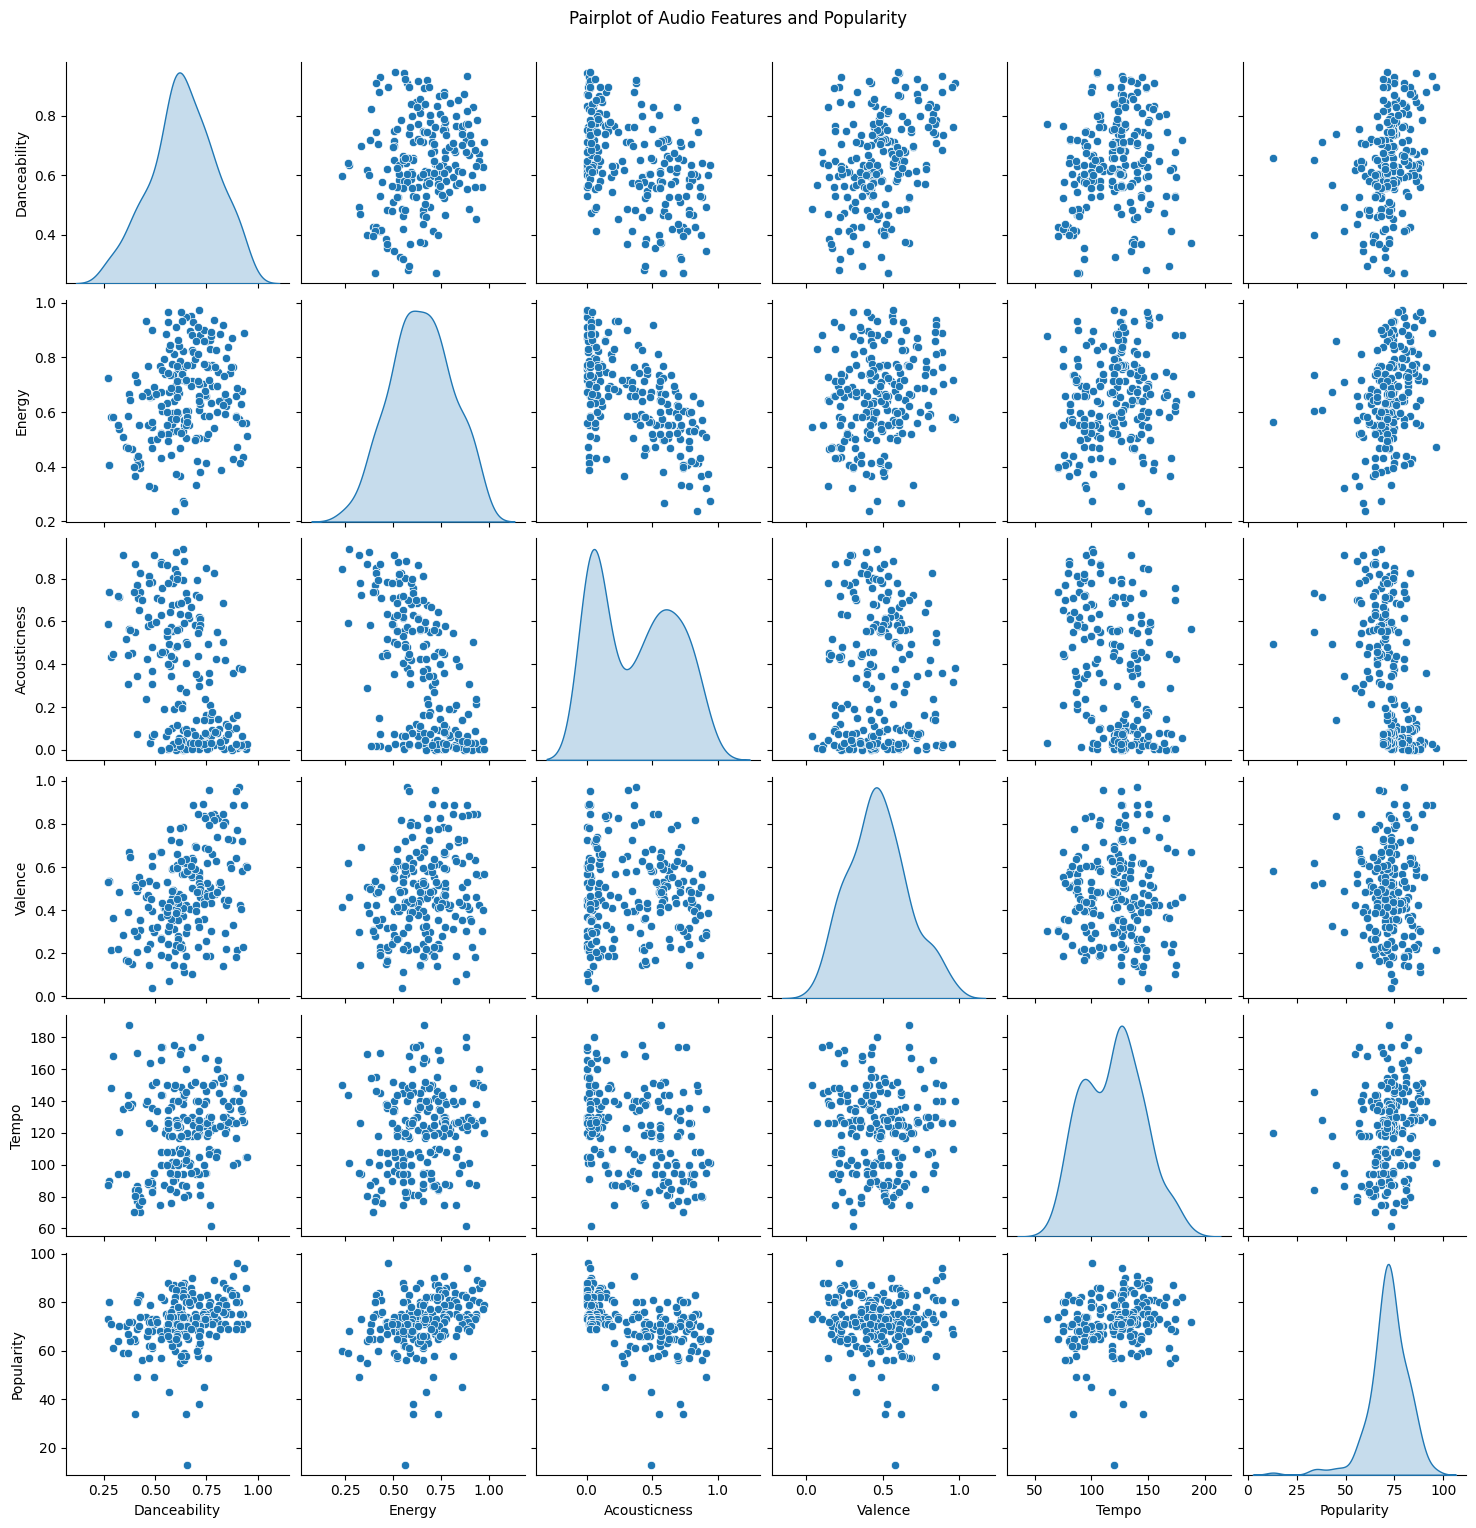

In [10]:
features_to_plot = ['Danceability', 'Energy', 'Acousticness', 'Valence', 'Tempo', 'Popularity']
sns.pairplot(data[features_to_plot], diag_kind='kde')
plt.suptitle('Pairplot of Audio Features and Popularity', y=1.02)
plt.show()

/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_5027/3677379348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Explicit', y='Popularity', data=data, palette='Set2')


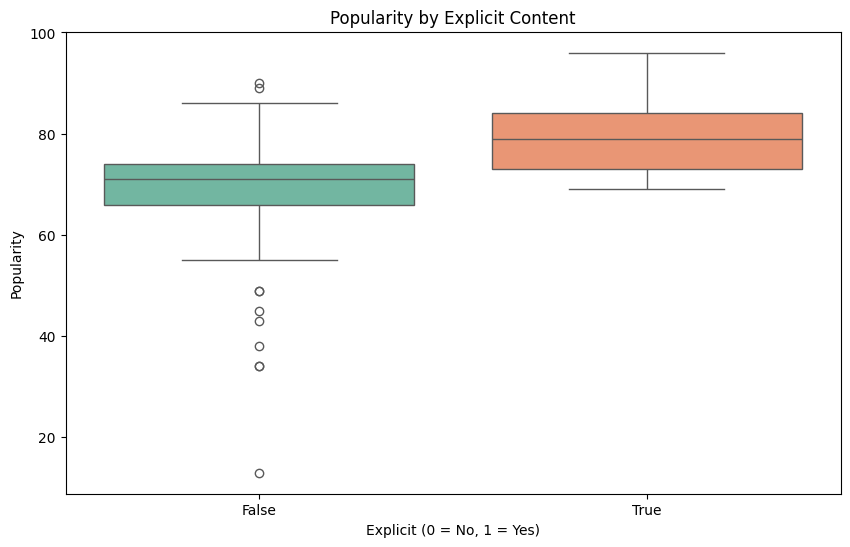

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Explicit', y='Popularity', data=data, palette='Set2')
plt.title('Popularity by Explicit Content')
plt.xlabel('Explicit (0 = No, 1 = Yes)')
plt.ylabel('Popularity')
plt.show()


Based on the boxplot, it appears that songs with explicit content tend to have higher popularity ratings compared to those without explicit content. However, there is also more variability in popularity among songs with explicit content.

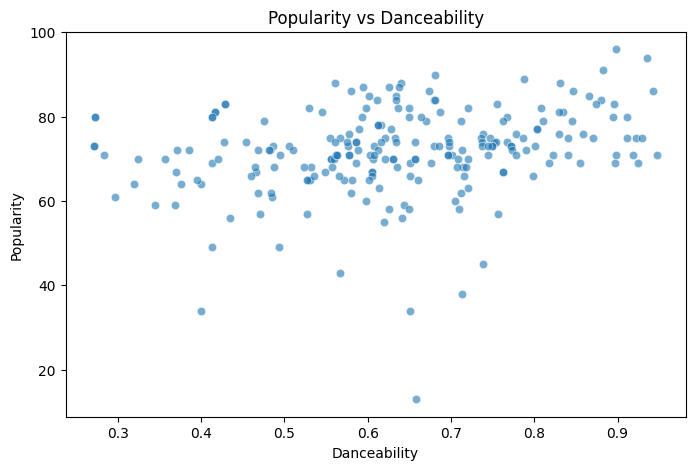

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Danceability', y='Popularity', data=data, alpha=0.6)
plt.title('Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()


The scatterplot suggests that songs with higher danceability tend to be more popular. However, it's essential to consider other factors that might impact song popularity when interpreting these results.

/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_5027/3186354736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mode', y='Popularity', data=data, palette='pastel')


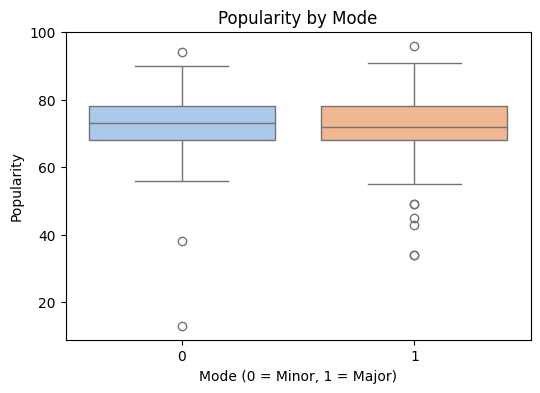

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Mode', y='Popularity', data=data, palette='pastel')
plt.title('Popularity by Mode')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Popularity')
plt.show()

Based on the boxplot, it appears that songs in minor mode tend to be more popular than those in major mode on Spotify. However, there is significant variability in popularity within each mode, and some songs may deviate substantially from the median values.

In [12]:
data = data.drop(columns=[
    'Track Name', 'Artists', 'Album Name', 'Album ID',
    'Track ID', 'External URLs'
])


In [14]:
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')
data['Release_Year'] = data['Release Date'].dt.year
data['Release_Month'] = data['Release Date'].dt.month
data['Release_Day'] = data['Release Date'].dt.day

data = data.drop(columns=['Release Date'])  # drop original date if not needed


In [15]:
data

,Unnamed: 0,Popularity,Duration (ms),Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Release_Year,Release_Month,Release_Day
0,0,96,274192,True,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,2024,5,4
1,1,94,227239,True,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003,2024,5,31
2,2,91,140733,True,0.882,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113,2024,5,23
3,3,90,149668,False,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976,2024,4,5
4,4,89,144846,False,0.788,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019,2024,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,66,272680,False,0.565,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068,2015,7,7
223,223,58,309103,False,0.626,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001,2020,10,21
224,224,62,281992,False,0.484,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653,2016,5,31
225,225,65,305232,False,0.602,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855,2023,7,7


In [17]:
data['Explicit'] = data['Explicit'].astype(int)

In [19]:
X = data.drop('Popularity', axis=1)
y = data['Popularity']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multiple Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)

print("🔹 Multiple Linear Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_lr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Multiple Linear Regression
MAE: 5.015214303010932
MSE: 47.94129774166736
RMSE: 6.923965463639125
🔹 R² Score (Accuracy for Regression): 0.27972318928310036


# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)

print("\n🔸 Polynomial Regression (Degree=2)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)



🔸 Polynomial Regression (Degree=2)
MAE: 68.87216172745791
MSE: 44466.96291772272
RMSE: 210.87191116344235
🔹 R² Score (Accuracy for Regression): -667.0779148956353


# SVR

In [29]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)

print("\n🔹 Support Vector Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_svr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Support Vector Regression
MAE: 5.300830524633904
MSE: 48.803142626045144
RMSE: 6.985924607812851
🔹 R² Score (Accuracy for Regression): 0.2667747103329202


# RandomForest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)

print("\n🔸 Random Forest Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔸 Random Forest Regression
MAE: 4.0108695652173925
MSE: 38.43333043478262
RMSE: 6.1994621085044646
🔹 R² Score (Accuracy for Regression): 0.4225722294802612


# XGB 

In [26]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_xgb)
MSE = mean_squared_error(y_test, y_pred_xgb)
RMSE = np.sqrt(MSE)

print("\n🔹 XGBoost Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)



🔹 XGBoost Regression
MAE: 4.214702606201172
MSE: 54.730342864990234
RMSE: 7.397995868138224


In [36]:
import matplotlib.pyplot as plt

# Store error values for each model
model_names = ['Linear', 'Polynomial','SVR', 'Random Forest','XGBoost']

mae_values = [
    mean_absolute_error(y_test, y_pred_lr),      # Linear Regression
    mean_absolute_error(y_test, y_pred_poly),    # Polynomial Regression 
    mean_absolute_error(y_test, y_pred_svr),     # SVR
    mean_absolute_error(y_test, y_pred_rf),      # Random Forest
    mean_absolute_error(y_test, y_pred_xgb)      # XGBoost
]

mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_xgb)
]

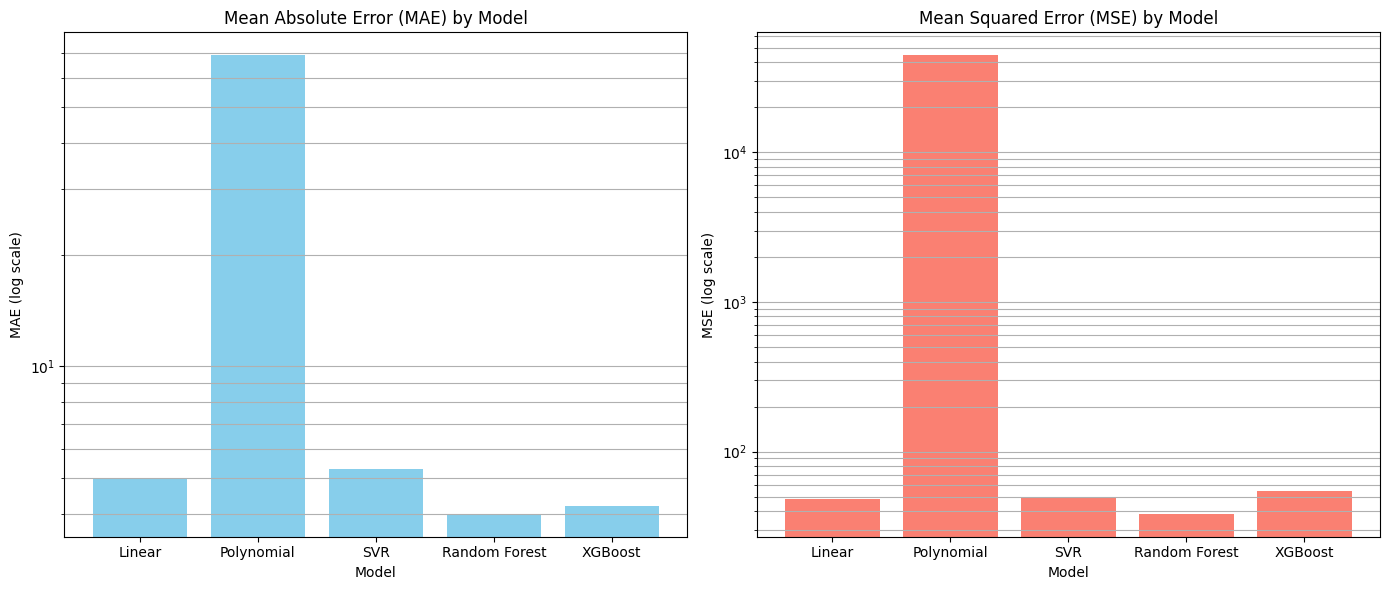

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MAE Plot (log scale)
axs[0].bar(model_names, mae_values, color='skyblue')
axs[0].set_title("Mean Absolute Error (MAE) by Model")
axs[0].set_ylabel("MAE (log scale)")
axs[0].set_xlabel("Model")
axs[0].set_yscale('log')  # ✅ log scale
axs[0].grid(axis='y', which='both')

# MSE Plot (log scale)
axs[1].bar(model_names, mse_values, color='salmon')
axs[1].set_title("Mean Squared Error (MSE) by Model")
axs[1].set_ylabel("MSE (log scale)")
axs[1].set_xlabel("Model")
axs[1].set_yscale('log')  # ✅ log scale
axs[1].grid(axis='y', which='both')

plt.tight_layout()
plt.show()


Based on the graphs, it appears that the Polynomial model is not suitable for predicting Spotify song popularity due to its high error rates. The other models, particularly Linear, SVR Model, Random Forest, and XGBoost, seem to be more effective in making accurate predictions.